
1. Modell trainieren
Trainingssetgröße:4387
Testsetgröße:1097
Genauigkeit: 0.9881494986326345
Precision: 1.0
Recall: 0.13333333333333333
F1 Score: 0.23529411764705882
Confusion Matrix: [[1082    0]
 [  13    2]]


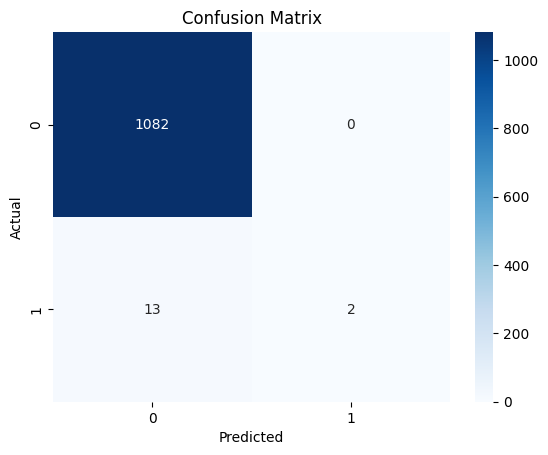

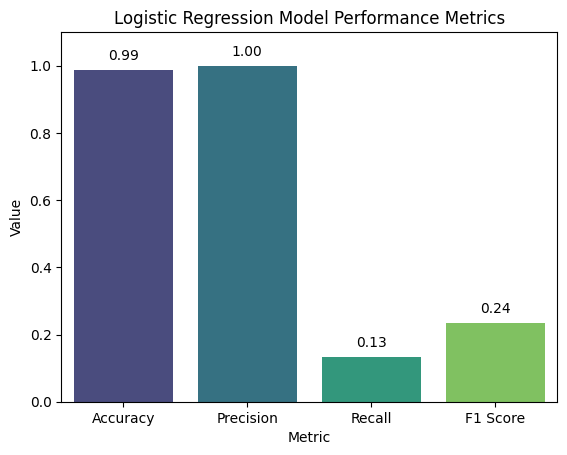

Fazit: Die Genauigkeit ist sehr hoch, kann aber bei unausgewogenen Daten irreführend sein. Der niedrige Recall-Wert von 0,13 und der niedrige F1-Score von 0,24 deuten darauf hin, dass das Modell viele echte positive Fälle nicht erkennt. Das Hauptproblem ist wahrscheinlich der Datensatz, die Daten sind unausgewogen, der SPAM-Anteil ist viel kleiner als der Nicht-Spam-Anteil.Um eine verlässliche Schätzung der Modellleistung auf neuen Daten zu erhalten und die Variabilität der Modellleistung zu bewerten, kann eine Kreuzvalidierung durchgeführt werden.

2. k-fache Kreuzvalidierung durchführen
Stratified K-Fold Cross Validation auf 5 Folds
Cross-Validation Scores: [0.98723792 0.98723792 0.98723792 0.9881495  0.98813869]
Mittlere Performanz auf 5 Folds:  0.9876003899154296
Standardabweichung der Performanz: 0.00044394437241151524
Die Kreuzvalidierung zeigt, dass das Modell sehr gute Ergebnisse liefert und robust ist. Allerdings weisen der niedrige Recall und der niedrige F1-Score zusammen mi

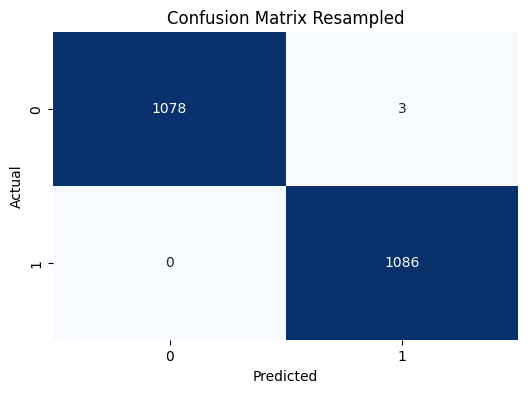

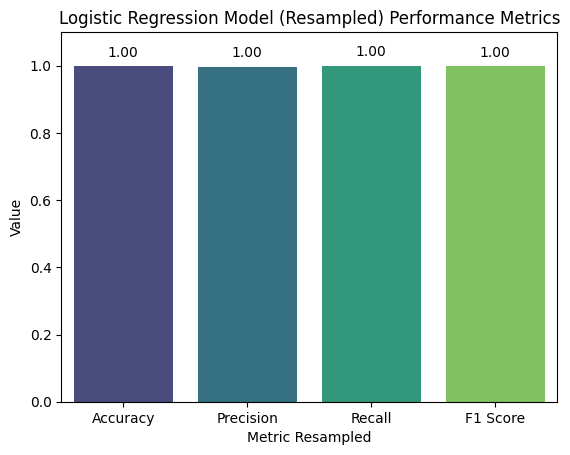

Fazit: Das Modell zeigt eine hohe Präzision und Genauigkeit und ist gut in der Lage zwischen positiven und negativen Klassen zu unterscheiden.Das Modell zeigt jedoch False Positives (3). Dies ist zwar eine sehr geringe Anzahl, aber in diesem Bereich könnten False Positives kritisch sein, da sie bedeuten, dass Nachrichten, die kein Spam sind, als Spam blockiert werden: zu viele False Positives können das Vertrauen der Benutzer in das System beeinträchtigen. Also können wir das Model nicht als 100% Lösung anwenden. Das Model muss noch weiter verbessert sein. 

5. Model  ist unter  spam_modelR.joblib gespeichert

6. Die Streamlit-App ist hier: https://spamornotp4g.streamlit.app/


In [21]:
from sklearn.model_selection import train_test_split #teilt die Daten in Training und Testsets auf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#from google.colab import drive #fuer Colab-Projekt
# Text in Zahlenfeatures konvertieren
from sklearn.feature_extraction.text import TfidfVectorizer
#drive.mount('/content/drive') #fuer Colab-Projekt

# Daten laden
# file_path = '/content/drive/MyDrive/Colab Notebooks/ProjektSpam/spam_nichtspam_datensatz.csv' #fuer Colab-Projekt
file_path = 'spam_nichtspam_datensatz.csv'
df = pd.read_csv(file_path)
X = df[['message']]  # Features
y = df['spam']  # Zielvariable


print()
print(f"1. Modell trainieren")

# Daten in Trainings- und Testsets aufteilen: 80% zu 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Trainingssetgröße:{X_train.shape[0]}')
print(f'Testsetgröße:{X_test.shape[0]}')

# Textdaten mit TfidfVectorizer vektorisieren
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train['message'])
X_test_vec = vectorizer.transform(X_test['message'])

# Modell Logistic Regression initialisieren und mit vektorisierten Daten trainieren
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Vorhersagen machen
y_pred = model.predict(X_test_vec)

# Genauigkeit berechnen
accuracy = accuracy_score(y_test, y_pred)
print(f'Genauigkeit: {accuracy}')

# y_test und y_pred in numerische Labels konvertieren
y_test_numeric = y_test.astype(int)
y_pred_numeric = y_pred.astype(int)

# Precision, Recall, F1 Score ausrechnen (mit numerischen Labels)
precision = precision_score(y_test_numeric, y_pred_numeric)
recall = recall_score(y_test_numeric, y_pred_numeric)
f1 = f1_score(y_test_numeric, y_pred_numeric)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Confusion Matrix (mit numerischen Labels)
cm = confusion_matrix(y_test_numeric, y_pred_numeric)
print(f'Confusion Matrix: {cm}')

# Confusion matrix plotten
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Metriken plotten
metrics = {'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],'Value': [accuracy, precision, recall, f1]}
df = pd.DataFrame(metrics)
sns.barplot(x='Metric', y='Value', hue='Metric', data=df, palette='viridis')
plt.ylim(0, 1.1)
plt.title('Logistic Regression Model Performance Metrics')
for i in range(len(df)):
    # Text auf den Balken setzen
    plt.text(i, df['Value'][i] + 0.02, f'{df["Value"][i]:.2f}', ha='center', va='bottom')
plt.show()

print(f"Fazit: Die Genauigkeit ist sehr hoch, kann aber bei unausgewogenen Daten irreführend sein. Der niedrige Recall-Wert von 0,13 und der niedrige F1-Score von 0,24 deuten darauf hin, dass das Modell viele echte positive Fälle nicht erkennt. Das Hauptproblem ist wahrscheinlich der Datensatz, die Daten sind unausgewogen, der SPAM-Anteil ist viel kleiner als der Nicht-Spam-Anteil.Um eine verlässliche Schätzung der Modellleistung auf neuen Daten zu erhalten und die Variabilität der Modellleistung zu bewerten, kann eine Kreuzvalidierung durchgeführt werden.")


print()
print(f"2. k-fache Kreuzvalidierung durchführen")
k = 5
print(f"Stratified K-Fold Cross Validation auf {k} Folds")
# Textdaten mit TfidfVectorizer vektorisieren
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X['message'])
# vektorisierten Daten an cross_val_score übergeben
scores = cross_val_score(model, X_vec, y, cv=k)
print(f'Cross-Validation Scores: {scores}')
print(f"Mittlere Performanz auf {k} Folds:  {scores.mean()}")
print(f"Standardabweichung der Performanz: {scores.std()}")

print(f"Die Kreuzvalidierung zeigt, dass das Modell sehr gute Ergebnisse liefert und robust ist. Allerdings weisen der niedrige Recall und der niedrige F1-Score zusammen mit auf das Problem der Klassenungleichgewichte hin.To Do: Korrektur des Klassenungleichgewichts - Data Augmentation")
print()
print(f"3. Über-Sampling-Methode anwenden- synthetische Beispiele für die Minderheitsklasse ")
# Über-Sampling-Methode SMOTE anwenden, es generiert synthetische Beispiele für die Minderheitsklasse, damit Klassenungleichgewicht ausgeglichen wird.
smote = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = smote.fit_resample(X_vec, y)

print('Ursprünglicher Datensatz %s' % pd.Series(y).value_counts())
print('Resampelter Datensatz %s' % pd.Series(y_res).value_counts())

print()
print(f"4. Modell  mit Über-Sampling Daten erneut trainieren")
# Über-Sampling Daten in Trainings- und Testsets aufteilen: 80% zu 20%
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
print(f'Über-Sampling Trainingssetgröße:{X_res_train.shape[0]}')
print(f'Über-Sampling Testsetgröße:{X_res_test.shape[0]}')

# Modell initialisieren und  mit Über-Sampling Daten trainieren
modelR = LogisticRegression()
modelR.fit(X_res_train, y_res_train)

# Vorhersagen (Über-Sampling) machen
y_res_pred = modelR.predict(X_res_test)

# Genauigkeit (Über-Sampling) berechnen
accuracyR = accuracy_score(y_res_test, y_res_pred)
print(f'Genauigkeit Über-Sampling: {accuracyR}')

# Über-Sampling y_res_test and y_res_pred in konvertieren
y_res_test_numeric = y_res_test.astype(int)
y_res_pred_numeric = y_res_pred.astype(int)

# Über-Sampling Precision, Recall, F1 Score ausrechnen (mit numerischen Labels )
precisionR = precision_score(y_res_test_numeric, y_res_pred_numeric)
recallR = recall_score(y_res_test_numeric, y_res_pred_numeric)
f1R = f1_score(y_res_test_numeric, y_res_pred_numeric)
print(f'Precision Resample: {precisionR}')
print(f'Recall Resample: {recallR}')
print(f'F1 Score Resample: {f1R}')

# Über-Sampling Confusion Matrix (mit numerischen Labels )
cmR = confusion_matrix(y_res_test_numeric, y_res_pred_numeric)
print(f'Confusion Matrix Resample: {cmR}')


#  Über-Sampling confusion matrix plotten
plt.figure(figsize=(6,4))
sns.heatmap(cmR, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Resampled')
plt.show()

#  Über-Sampling Metriken plotten
metrics = {'Metric Resampled': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],'Value': [accuracyR, precisionR, recallR, f1R]}
df = pd.DataFrame(metrics)
sns.barplot(x='Metric Resampled', y='Value', hue='Metric Resampled', data=df, palette='viridis')
plt.ylim(0, 1.1)
plt.title('Logistic Regression Model (Resampled) Performance Metrics')
for i in range(len(df)):
    # Text auf den Balken setzen
    plt.text(i, df['Value'][i] + 0.02, f'{df["Value"][i]:.2f}', ha='center', va='bottom')
plt.show()

print(f"Fazit: Das Modell zeigt eine hohe Präzision und Genauigkeit und ist gut in der Lage zwischen positiven und negativen Klassen zu unterscheiden.Das Modell zeigt jedoch False Positives (3). Dies ist zwar eine sehr geringe Anzahl, aber in diesem Bereich könnten False Positives kritisch sein, da sie bedeuten, dass Nachrichten, die kein Spam sind, als Spam blockiert werden: zu viele False Positives können das Vertrauen der Benutzer in das System beeinträchtigen. Also können wir das Model nicht als 100% Lösung anwenden. Das Model muss noch weiter verbessert sein. ")

#Model speichern
file_path = 'spam_modelR.joblib'
joblib.dump(modelR, file_path)
joblib.dump(vectorizer, 'vectorizer.joblib')
print()
print(f"5. Model  ist unter  {file_path} gespeichert")

print()
link = "https://spamornotp4g.streamlit.app/"
print("6. Die Streamlit-App ist hier:", link)

In [11]:
import csv
import joblib
import pandas as pd

#Effektivität des vorhanden Spam-Filter überprüfen.
# CSV-Datei oeffnen und sie Zeile für Zeile einlesen
with open('spam_nichtspam_datensatz.csv', 'r', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)

    # alle Zeilen ohne Zeilenumbrüche speichern
    cleaned_rows = []
    for row in reader:
        #  Zeilenumbrüche aus jeder Zelle entfernen
        cleaned_row = [cell.replace('\n', ' ').replace('\r', ' ') for cell in row]
        cleaned_rows.append(cleaned_row)

# bereinigten Zeilen in eine neue CSV-Datei schreiben
with open('spam_nichtspam_datensatz_output.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(cleaned_rows)

# Spam-Woerter Liste
spam_words = ["sex", "porno", "porn", "erotik", "erotisch", "erotic", "nackt", "nude", "camgirl","milf","eskort","dating", "escort","sexchat", "sex chat","xxx"]
file_path = 'spam_nichtspam_datensatz_output.csv'

# Nachricht im Kleinbuchstaben konvertieren 
def check_spam(message: str, spam_words: list) -> bool:
    message_lower = message.lower()
    for word in spam_words:
        if word in message_lower:
            return True
    return False

# Anzahl der Spam- und Nicht-Spam-Nachrichten zählen
def process_messages_from_file(file_path: str, spam_words: list):
    spam_count = 0
    non_spam_count = 0

    with open(file_path, 'r', encoding='utf-8') as file:
        messages = file.readlines()

    for i, message in enumerate(messages, start=1):
        if check_spam(message.strip(), spam_words):
            spam_count += 1
            #print(f"Das ist Spam: {message.strip()}")
        else:
            non_spam_count += 1
    print(f"Effektivität von dem Spam-Filter:")
    print(f"Anzahl von Nicht-Spam-Nachrichten-  {non_spam_count} (im Datensatz 5447)")
    print(f"Anzahl von gefilterten Spam-Nachrichten - {spam_count} (im Datensatz 68)")
   
process_messages_from_file(file_path, spam_words)

# Effektivität des trainierten Modells am selben Datensatz überprüfen.
# das trainierte Modell und den Vektorisierer laden, den csv-Datensatz lesen

model = joblib.load('spam_modelR.joblib')
vectorizer = joblib.load('vectorizer.joblib')
data = pd.read_csv('spam_nichtspam_datensatz_output.csv')

message = data['message']
message_vectors = vectorizer.transform(message)
predictions = model.predict(message_vectors)
data['prediction'] = predictions
spam_count = data['prediction'].value_counts()
print()
print(f"Effektivität des trainierten Modells:")
print(f"Modelvorhersage - Anzahl von Spam (1)  und Nicht-Spam (0)  Nachrichten: {spam_count}")
print()
print(f"Fazit: ")


Effektivität von dem Spam-Filter:
Anzahl von Nicht-Spam-Nachrichten-  5447 (im Datensatz 5447)
Anzahl von gefilterten Spam-Nachrichten - 38 (im Datensatz 68)

Effektivität des trainierten Modells:
Modelvorhersage - Anzahl von Spam (1)  und Nicht-Spam (0)  Nachrichten: prediction
0    5407
1      77
Name: count, dtype: int64

Fazit: 
